<a href="https://colab.research.google.com/github/dblack954/problem-statistics/blob/main/Lab_8_Dylan_Black.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# Prevents things from being displayed
!pip install wandb              # Installs wieghts and biases to the program
!apt-get install poppler-utils   # Installs a package that includes tools
# that manipulate PDF files
!pip install pdf2image    # Installs a package that converts PDF files to
# Images
!pip install flashtorch   # Installs flashtorch which is used for training and
# deep learning models
import requests   # a tool that is for HTTP requests
from pdf2image import convert_from_path   # The function to converts the
# PDF files to a list of JPEG images
import matplotlib.pyplot as plt   # Importing plotting tools
import numpy as np        # Importing the numpy functions
import torch          # Importing torch functions
import requests       # Importing requests functions
from torchvision import *   # Importing torchvision which includes many models
# and datasets for computer vision tasks
from torchvision.models import *  # importing torchvision but with models as
# well
import wandb as wb      # Importing the weights and biases function

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# checking if the CUDA-enabled GPU device is available on the system
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
    # Return "True" statement

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)
    # Return "False" statement

def plot(x):    # Plot settings
    fig, ax = plt.subplots()    # Creating a subplot
    im = ax.imshow(x, cmap = 'gray')    # Subplot will have a gray colormap
    ax.axis('off')      # Axis setting is off
    fig.set_size_inches(5, 5)   # Setting the size of the subplot
    plt.show()      # Showing plot

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"    # Head of the url
    # link
    url_body = url.split('/')[5]    # Url body consists of a url split that's
    # within the sixth element
    page_id = url.split('.')[-1]    # page id consists of a url split that's
    # within the last last element
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
    # Return function that combines all of the elements together

def get_slides(url):
    url = get_google_slide(url)   # Implementing the variable that was used from
    # last code
    r = requests.get(url, allow_redirects=True)   # Using the requests function
    open('file.pdf', 'wb').write(r.content)   # Opening the PDF file in brinary
    # write mode
    images = convert_from_path('file.pdf', 500) # PDF is converted to PIL images
    # with a 500 DPI resolution
    return images   # Return function for images

def load(image, size=224):    # Loading the image which includes the size as well
    means = [0.485, 0.456, 0.406]   # The mean values for the image's dimensions
    stds = [0.229, 0.224, 0.225]# The standard deviation values for the image's
    # dimensions
    transform = transforms.Compose([  # Initiating mulptiple chains of
                                    # Transformations
        transforms.Resize(size),    # Resize Transformation
        transforms.CenterCrop(size),  # Center Crop Transformation
        transforms.ToTensor(),    # Tensor Transformation
        transforms.Normalize(means, stds)   # Tensor Normalize Transformation
    ])
    tensor = transform(image).unsqueeze(0).to(device) # Implementing the
    # Transformation commands to the image and system
    tensor.requires_grad = True       # Enabling gradient tracking for the tensor
    return tensor   # Return function for the tensor



In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
# Request to aquire URL link

model = alexnet(weights='DEFAULT').to(device)   # Creating an instance of Alexnet
# with default weights and its moved to the device
model.eval();   # Switching the model to evaluation mode

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 135MB/s]


In [4]:
url = "https://docs.google.com/presentation/d/1IAoV3NDbhKtNjs21zgxFvxN8uz-ZWK4fVy6hhn8Y7xo/edit#slide=id.g2b78f466226_0_246"
#Url link that loads in the pictures from google dirve

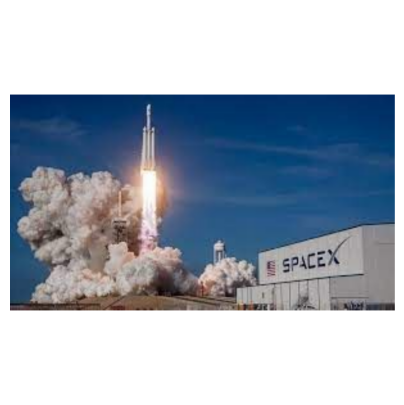

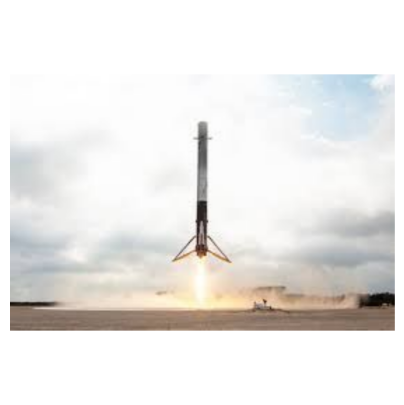

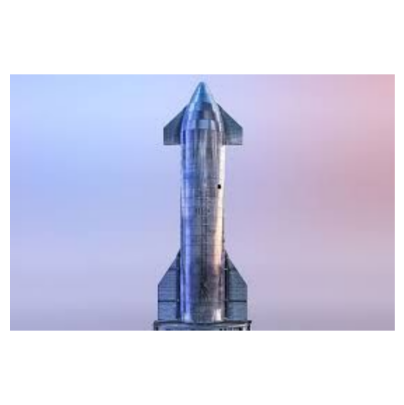

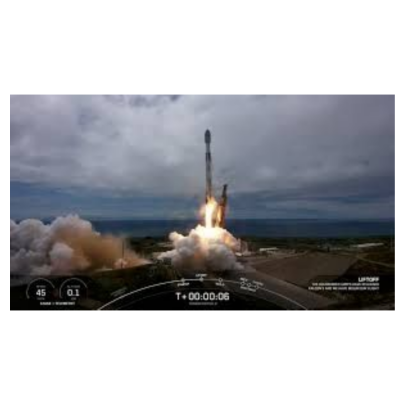

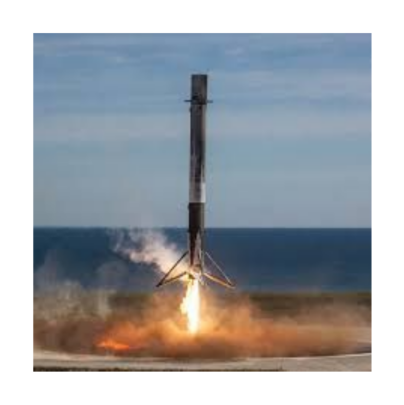

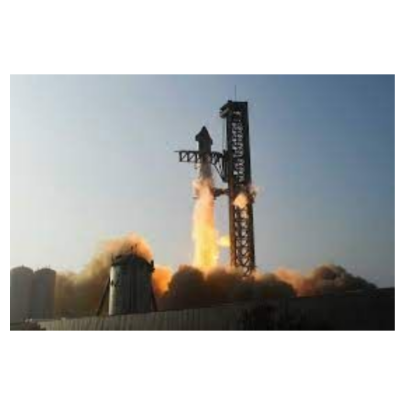

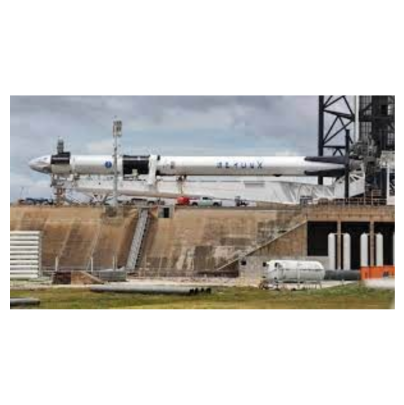

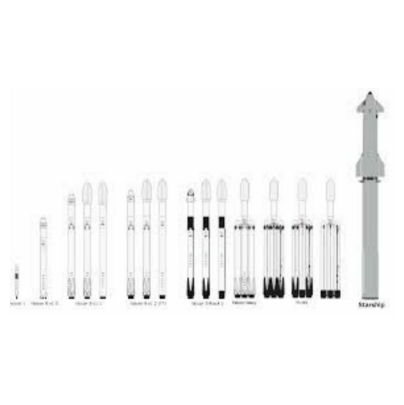

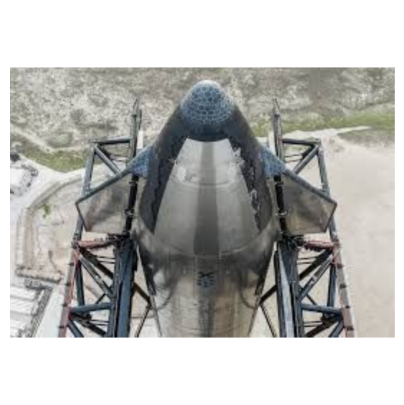

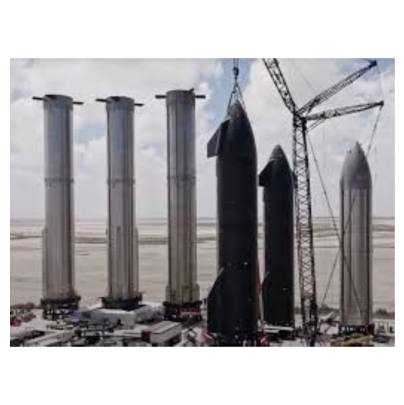

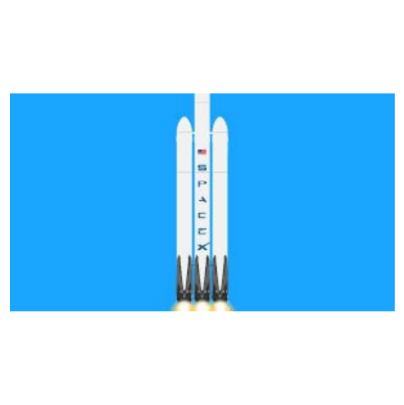

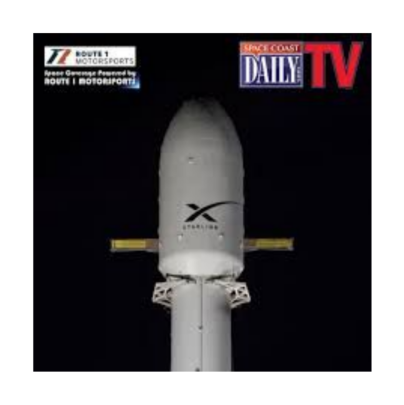

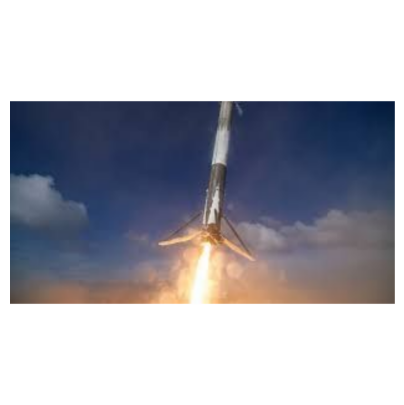

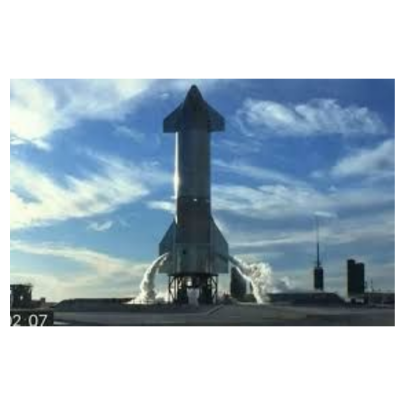

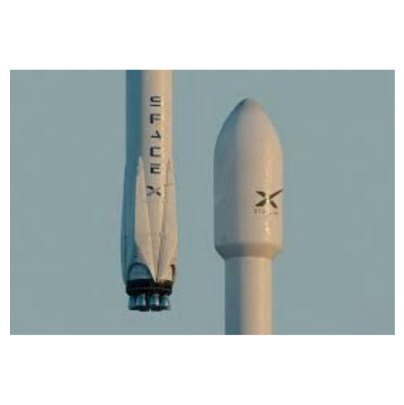

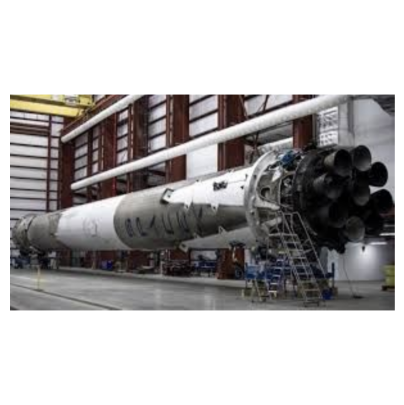

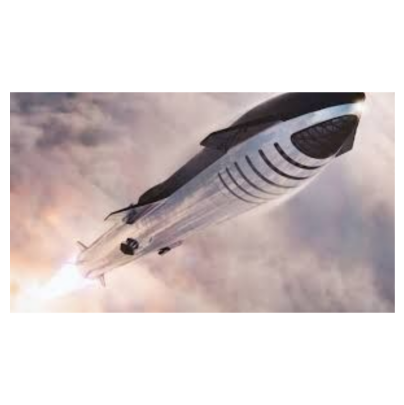

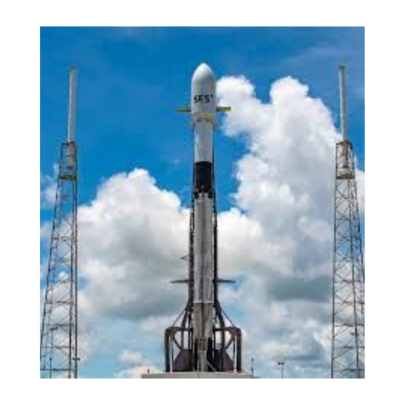

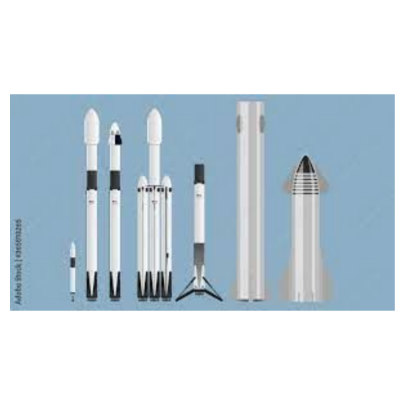

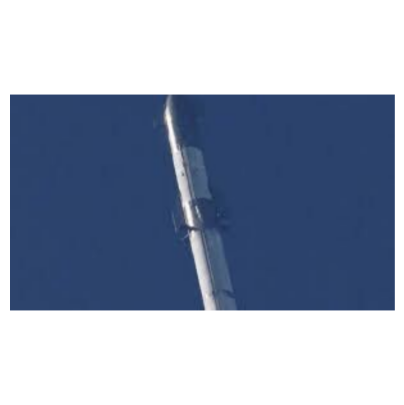

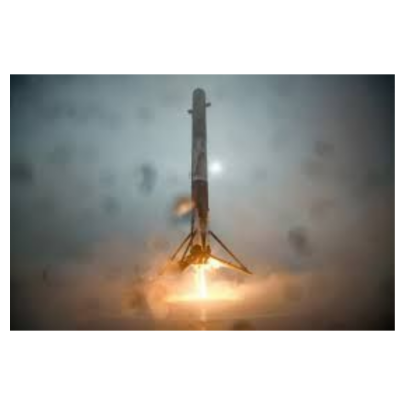

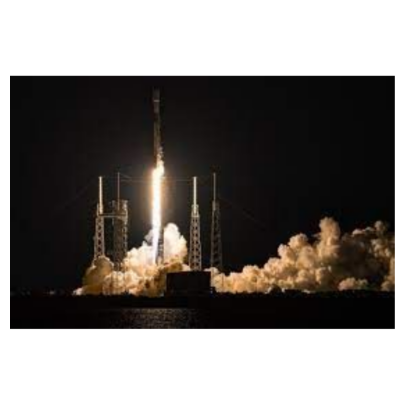

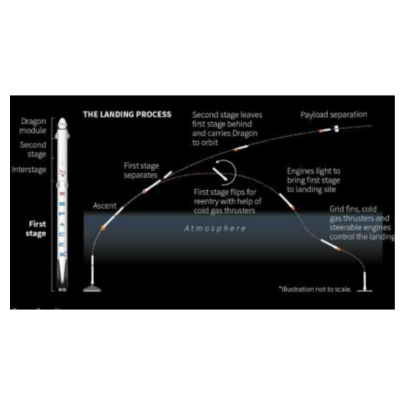

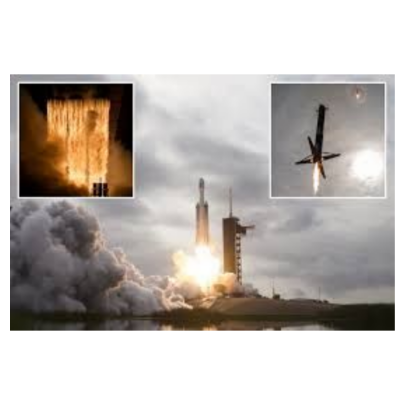

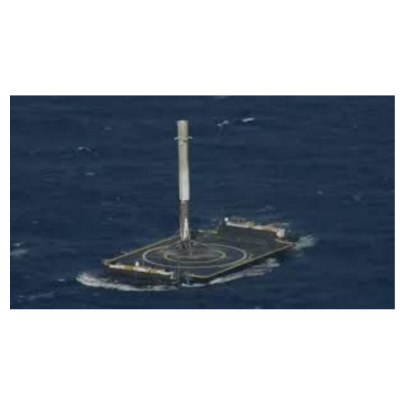

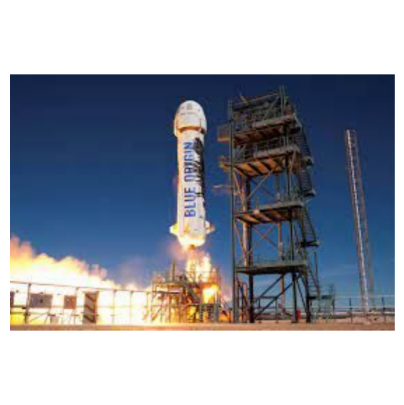

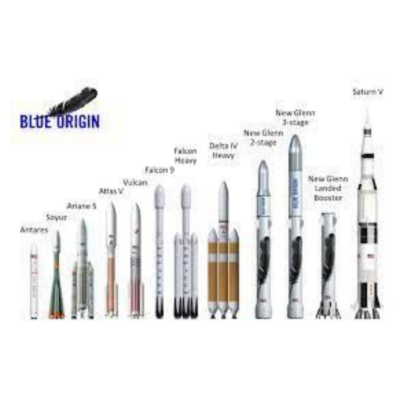

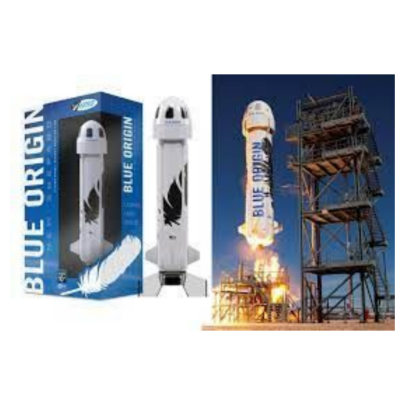

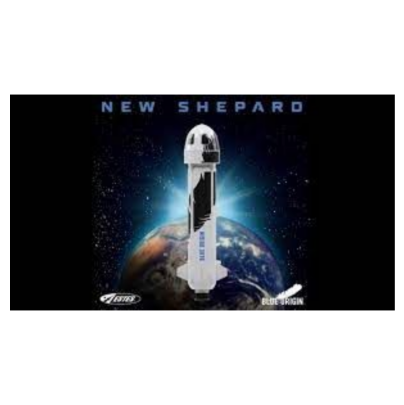

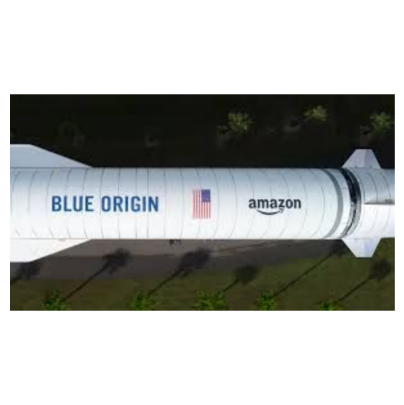

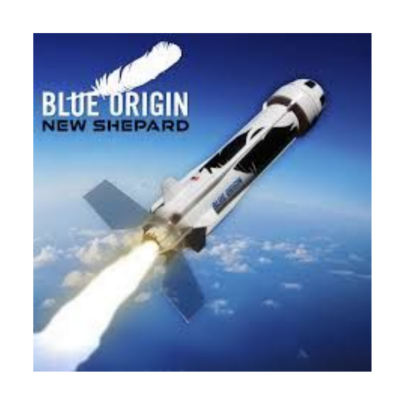

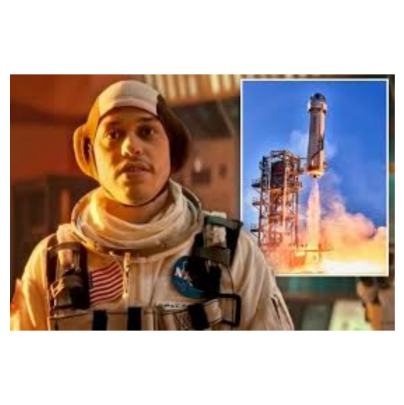

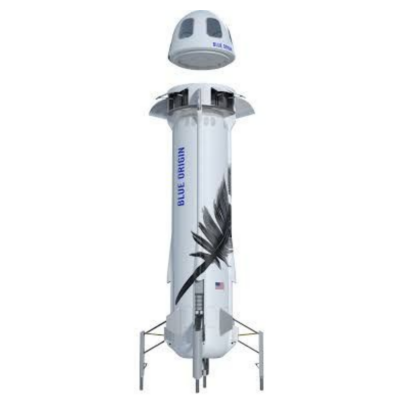

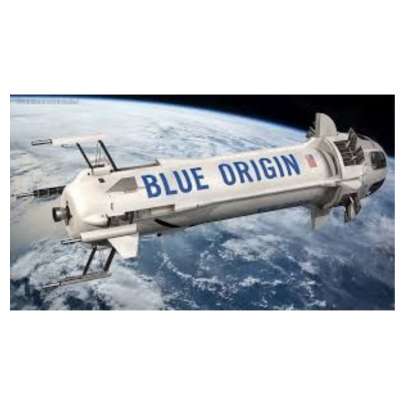

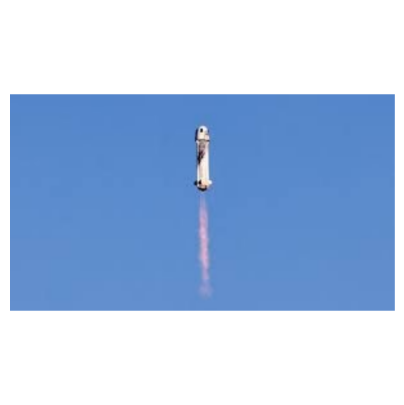

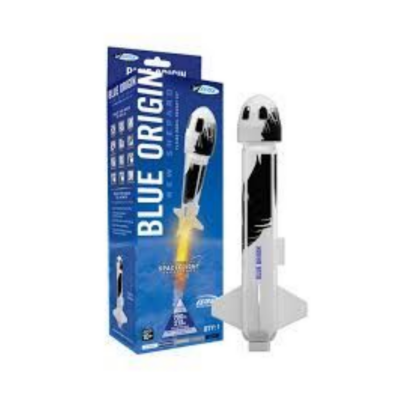

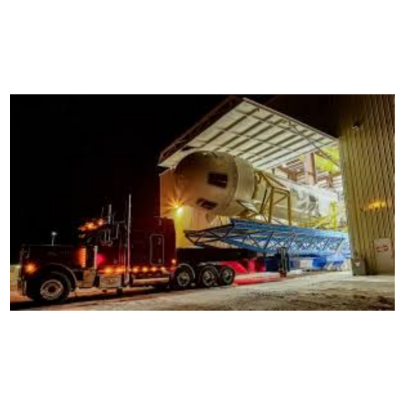

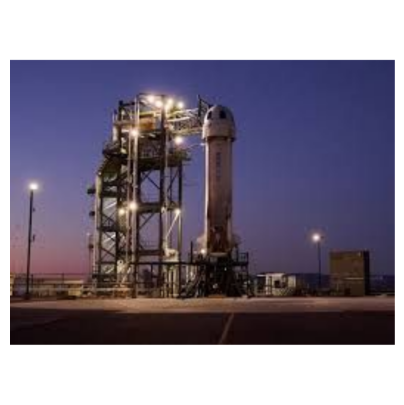

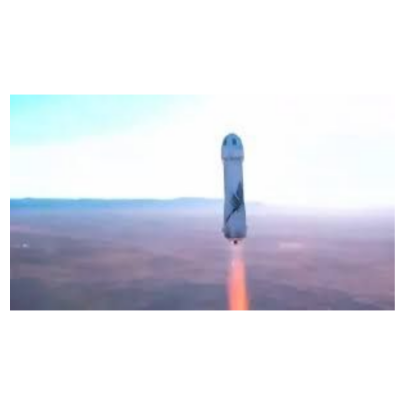

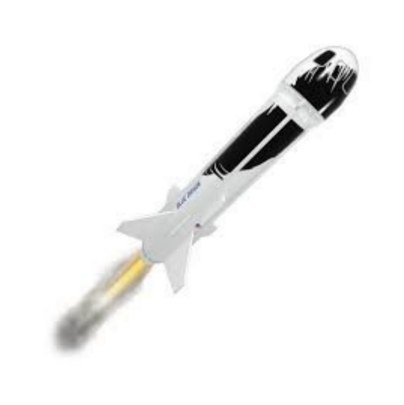

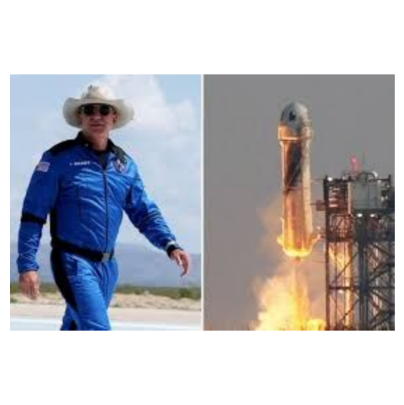

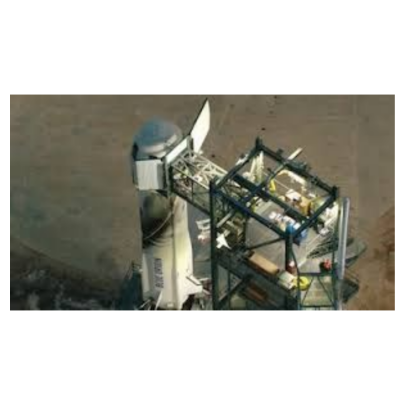

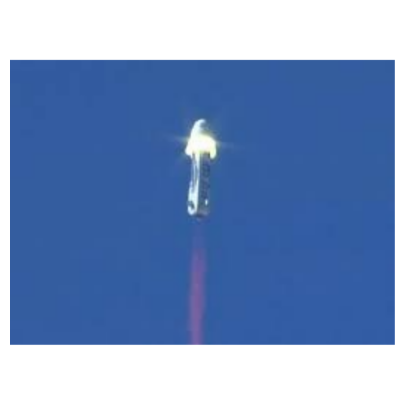

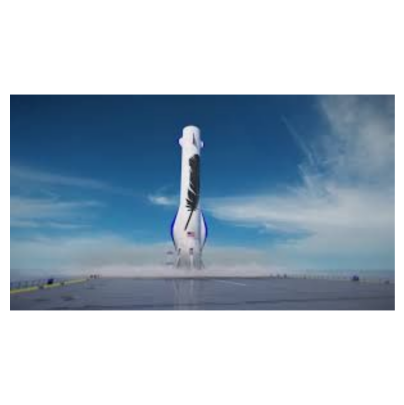

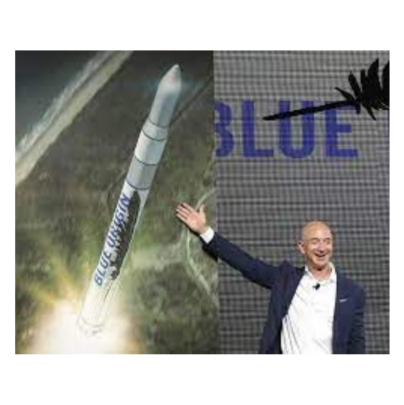

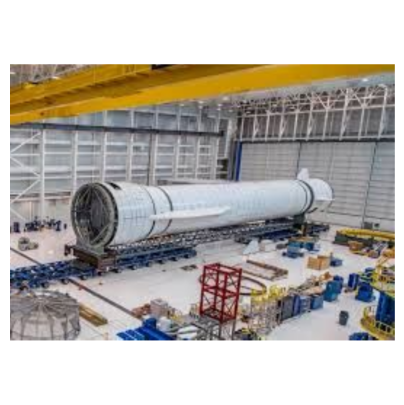

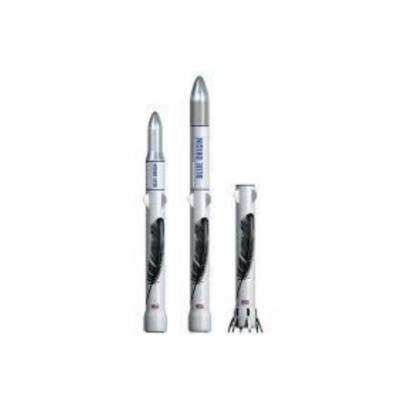

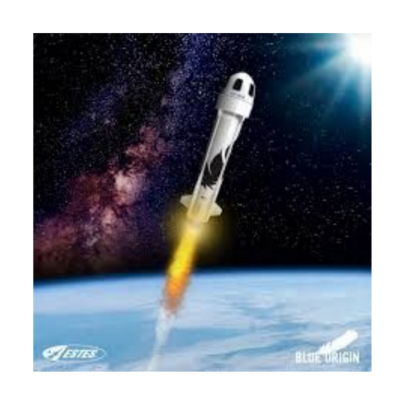

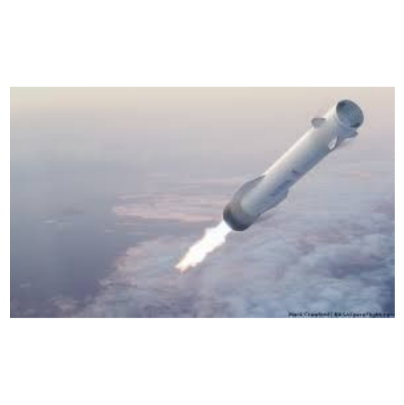

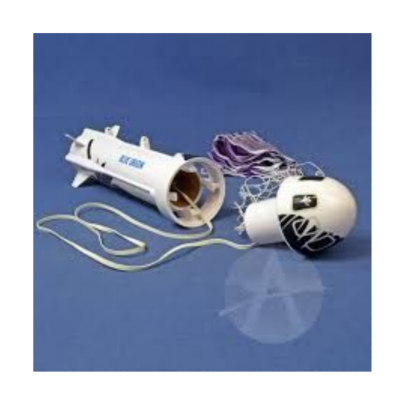

In [5]:
images = []

for image in get_slides(url):       #Code to upload the photos

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape    # The dimensions of the shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)     #RGB dimensions of the pictures

tensor([[-4.4859, -1.9622, -0.4950,  ..., -4.5325,  2.3382,  0.2733],
        [-2.6921, -3.6249,  1.8689,  ..., -4.6524, -1.6406, -0.0740],
        [-2.5635, -0.6893,  0.5704,  ..., -4.9149, -0.7559,  0.3770],
        ...,
        [-1.0446,  0.9287,  2.9946,  ..., -4.9203,  0.6787,  0.0492],
        [-2.4219, -4.0691,  4.0751,  ..., -6.9345, -1.4852,  1.6493],
        [-5.4022, -4.5221, -2.0315,  ..., -5.5951, -0.9986,  3.3488]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)     # "y" is displayed as the previous code

In [9]:
y.shape # The dimensions of the "y" tensor

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()    # Values of "y" tensor are
# converted to numpy values

In [11]:
for i in list(guesses):     # The result of the guesses alexnet has given
    print(labels[i])

space shuttle
missile
table lamp
projectile, missile
projectile, missile
space shuttle
wreck
rule, ruler
Weimaraner
carpenter's kit, tool kit
binder, ring-binder
espresso maker
projectile, missile
megalith, megalithic structure
cleaver, meat cleaver, chopper
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
airship, dirigible
drilling platform, offshore rig
screw
binder, ring-binder
projectile, missile
space shuttle
radio, wireless
studio couch, day bed
letter opener, paper knife, paperknife
drilling platform, offshore rig
screw
cassette
television, television system
can opener, tin opener
ski
web site, website, internet site, site
corkscrew, bottle screw
airship, dirigible
binder, ring-binder
Band Aid
web site, website, internet site, site
drilling platform, offshore rig
ballpoint, ballpoint pen, ballpen, Biro
screwdriver
web site, website, internet site, site
binder, ring-binder
binder, ring-binder
sandbar, sand bar
Windsor tie
puck, hockey puck
screw
pelican

In [12]:
Y = np.zeros(50,)   # an array of 50 zeros
Y[25:] = 1        # From the element 25-50 is now equal to one

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [15]:
Y   # The result of "Y"

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
X = y.detach().cpu().numpy()    #"X" is the detachment of the "y" tensor from
# the computational graph, moved to the CPU, and converted to numpy

In [17]:
X.shape   # The dimensions of "X"

(50, 1000)

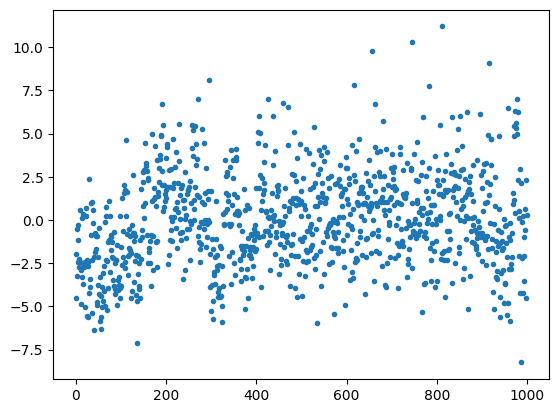

In [18]:
plt.plot(X[0],'.')    #Plotting "X" (the first element of the array with dots

(array([  4.,  46., 132., 275., 258., 183.,  70.,  25.,   4.,   3.]),
 array([-8.2457943 , -6.30075121, -4.35570812, -2.41066527, -0.46562234,
         1.47942066,  3.42446375,  5.36950684,  7.31454945,  9.25959301,
        11.20463562]),
 <BarContainer object of 10 artists>)

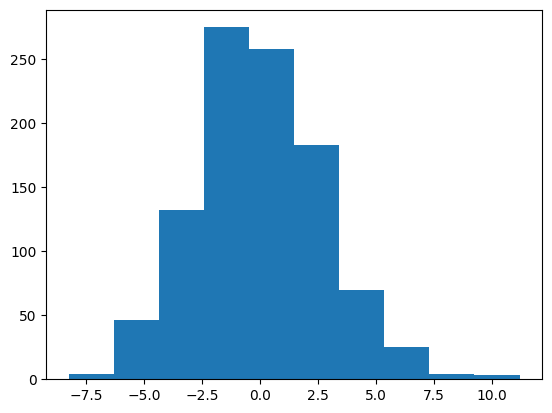

In [19]:
plt.hist(X[0])    # Creating a histogram with "X" (The first element of the array)

In [20]:
X = GPU_data(X)   # Moving the data to the GPU
Y = GPU_data(Y)

In [21]:
def softmax(x):       # Mathematical function that takes numbers into a
# probability distribution
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [22]:
def cross_entropy(outputs, labels):   # Merasuring the difference between two
# probability fucntions
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [23]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [24]:
def Truncated_Normal(size):   # Truncated Normal Distribution

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [25]:
def acc(out,y):       # Accuracy function if the model's predictions
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [26]:
X.shape     # The dimensions of "X"

torch.Size([50, 1000])

In [27]:
def get_batch(mode):      # Retrieving the batches of data
    b = c.b
    if mode == "train":       # Training Alexnet
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":       # Testing Alexnet
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y      # Return fucntion of "x" and "y"

In [28]:
def model(x,w):     # Modeling the varibles "x" and "w"

    return x@w[0]     # return function of "x" and "w" that are muliplied
    # and accesses the first element of the resulting matrix

In [29]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");    # Initializing the weights and biases
c = wb.config   # Configuring the weights and biases

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):   # Iterating the sequence

    x,y = get_batch('train')      #The training batch

    loss = cross_entropy(softmax(model(x,w)),y)   # Finding the differences

    optimizer.zero_grad()   #Zeroing out the gradients of the model parameters
    loss.backward()       # Computing the gradients of the loss with respect to
    # the model parameters
    optimizer.step()    # Updating the model parameters using the gradients from
    # previous code

    wb.log({"loss": loss})    # This logs the values of the loss variable to the
    # weights and biases

    make_plots()    # Creating Plots


<IPython.core.display.Javascript object>

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check the shape of a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)  # Should print: torch.Size([64, 1, 28, 28]) for 64 images of size 28x28 and 1 channel
print(labels.shape)  # Should print: torch.Size([64]) for 64 labels
